## Spectrum

**Definition**  
The Fourier Transform of a signal reveals its **spectrum**, which provides critical information about the signal's frequency content. Mathematically, if $x(t)$ is a time-domain signal, its spectrum is given by $X(f)$, where:

$$
x(t) \overset{\mathcal{F}}{\longrightarrow} X(f).
$$

This spectrum $X(f)$ quantifies how much of each frequency $f$ is present in the signal $x(t)$.

#### Complex Conjugation and Hermitian Symmetry

The Fourier Transform of the complex conjugate of a signal, $x^*(t)$, is related to the spectrum by:

$$
\mathcal{F}\{x^*(t)\} = X^*(-f).
$$

For real-valued signals $x(t)$, the spectrum exhibits **Hermitian symmetry**, where:

$$
X(-f) = X^*(f).
$$

This means that the magnitude of the spectrum is symmetric ($|X(-f)| = |X(f)|$) and the phase is anti-symmetric ($\angle X(-f) = -\angle X(f)$). In other words:
- The **magnitude** spectrum of a real signal is an even function, symmetric about the vertical axis.
- The **phase** spectrum of a real signal is an odd function, symmetric about the origin.


### Frequency Support

**Definition**  
The **frequency support** of a signal refers to the range of frequencies over which the spectrum $X(f)$ is non-zero. For band-limited signals, this support is typically defined as:

$$
[-W, +W],
$$

where $W$ is the maximum frequency of the signal's spectrum.



#### Positive and Negative Spectrum

The spectrum of a signal can be decomposed into its **positive spectrum** ($X_+(f)$) and **negative spectrum** ($X_-(f)$), which are defined as follows:

$$
X_+(f) = 
\begin{cases} 
X(f), & f > 0, \\
\frac{1}{2}X(0), & f = 0, \\
0, & f < 0,
\end{cases}
$$

$$
X_-(f) = 
\begin{cases} 
X(f), & f < 0, \\
\frac{1}{2}X(0), & f = 0, \\
0, & f > 0.
\end{cases}
$$

This decomposition separates the spectrum into components that correspond to positive and negative frequencies, facilitating the analysis of complex and real-valued signals.


#### Python Simulation

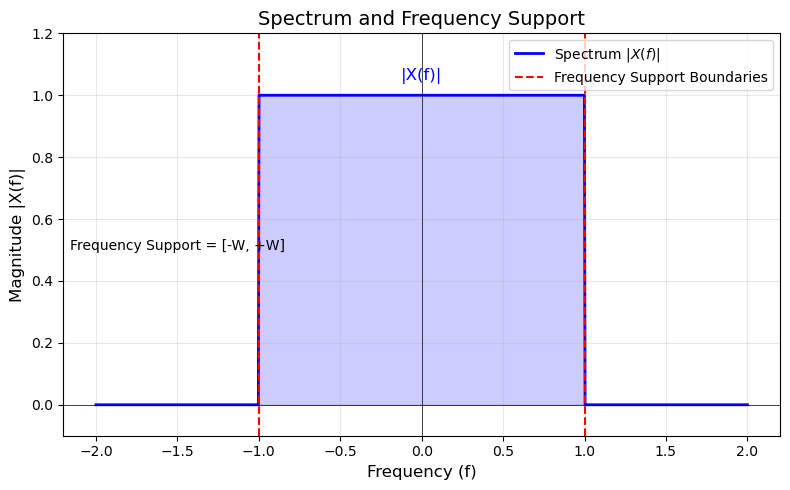

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency range and spectrum
f = np.linspace(-2, 2, 1000)  # Frequency range from -2W to 2W
spectrum = np.where((f >= -1) & (f <= 1), 1, 0)  # Define spectrum: 1 in [-W, W], 0 otherwise

# Plotting the spectrum and frequency support
plt.figure(figsize=(8, 5))
plt.plot(f, spectrum, label="Spectrum $|X(f)|$", color='blue', lw=2)
plt.axvline(-1, color='red', linestyle='--', label="Frequency Support Boundaries")
plt.axvline(1, color='red', linestyle='--')
plt.fill_between(f, spectrum, color='blue', alpha=0.2)

# Annotate the frequency support region
plt.text(-1.5, 0.5, "Frequency Support = [-W, +W]", fontsize=10, color='black', ha='center')
plt.text(0, 1.05, "|X(f)|", fontsize=12, color='blue', ha='center')

# Customize plot appearance
plt.title("Spectrum and Frequency Support", fontsize=14)
plt.xlabel("Frequency (f)", fontsize=12)
plt.ylabel("Magnitude |X(f)|", fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)
plt.ylim([-0.1, 1.2])
plt.tight_layout()

# Show plot
plt.show()


### Example of `sinc` signal

The time-domain sinc signal is defined as:

$$
\text{sinc}(t) = \frac{\sin(2\pi B t)}{2\pi B t},
$$

where $ B $ is the bandwidth.

#### Fourier Transform of a Sinc Signal

The Fourier Transform (FT) of a signal $ x(t) $ is given by:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} dt.
$$

Substituting $ \text{sinc}(t) $ into this definition:

$$
X(f) = \int_{-\infty}^{\infty} \frac{\sin(2\pi B t)}{2\pi B t} e^{-j 2 \pi f t} dt.
$$

The sinc function in the time domain is known to have a rectangular Fourier Transform:

$$
X(f) = \Pi(f) =
\begin{cases} 
1, & |f| \leq B, \\
0, & |f| > B.
\end{cases}
$$

This result means that the Fourier Transform of a sinc function is a rectangle function in the frequency domain, centered at $ f = 0 $ with a width of $ 2B $.


Recall that the magnitude of the spectrum is symmetric ($|X(-f)| = |X(f)|$) and the phase is anti-symmetric ($\angle X(-f) = -\angle X(f)$):
- The **magnitude** spectrum of a real signal is an even function, symmetric about the vertical axis.
- The **phase** spectrum of a real signal is an odd function, symmetric about the origin.

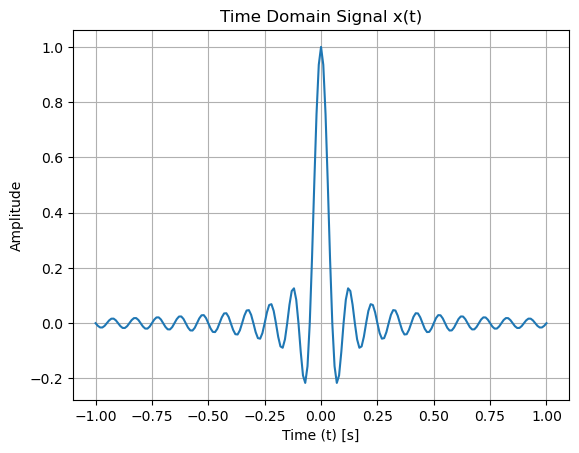

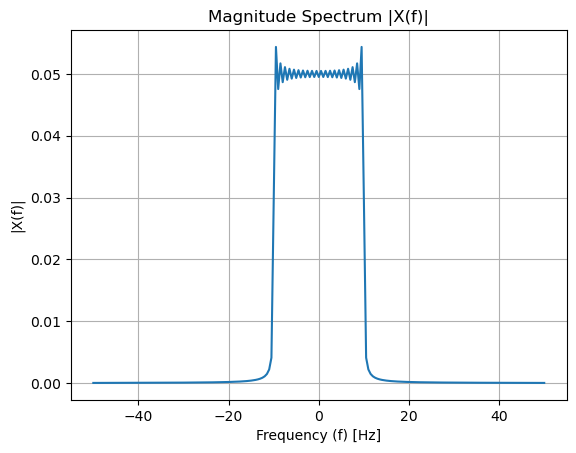

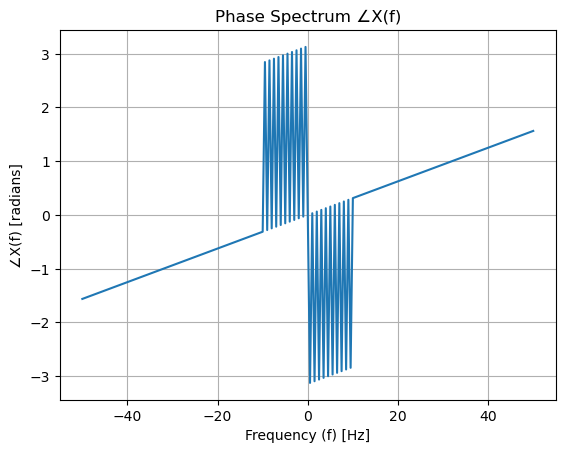

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

# Define the duration of the sinc signal
T = 1  # seconds

# Define the time domain parameters
fs = 100  # Sampling frequency in Hz
t = np.arange(-T, T + 1/fs, 1/fs)  # Time vector
dt = T/fs  # Time step size

# Define the sinc function in the time domain
bandwidth = 10  # Bandwidth of the lowpass signal
x_t = np.sinc(2 * bandwidth * t)  # sinc in numpy is normalized by pi

# Perform the numerical Fourier Transform using the FFT
X_f_sim = np.fft.fftshift(np.fft.fft(x_t)) * dt  # Multiply by dt to approximate the integral

# Plot the time-domain sinc signal
plt.figure()
plt.plot(t, x_t, linewidth=1.5)
plt.title('Time Domain Signal x(t)')
plt.xlabel('Time (t) [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Calculate magnitude and phase of the numerical Fourier Transform
magnitude = np.abs(X_f_sim)
phase = np.angle(X_f_sim)

# Plot the magnitude spectrum
plt.figure()
plt.plot(f_num, magnitude, linewidth=1.5)
plt.title('Magnitude Spectrum |X(f)|')
plt.xlabel('Frequency (f) [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True)

# Plot the phase spectrum
plt.figure()
plt.plot(f_num, phase, linewidth=1.5)
plt.title('Phase Spectrum ∠X(f)')
plt.xlabel('Frequency (f) [Hz]')
plt.ylabel('∠X(f) [radians]')
plt.grid(True)

plt.show()


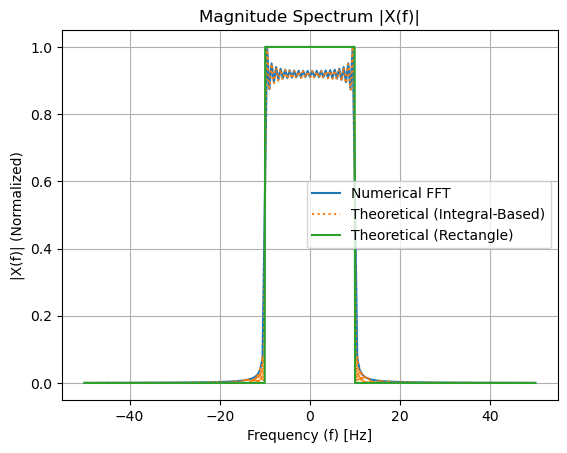

In [72]:
# Generate the frequency vector for the numerical approach
f_num = np.linspace(-fs/2, fs/2, len(X_f_sim))

# Define the frequency range for the theoretical FT calculation
f_theo = np.linspace(-fs/2, fs/2, 1024)  # More points for smoother theoretical curve

# Pre-allocate the array for the theoretical FT
X_f_theo = np.zeros_like(f_theo, dtype=complex)

# Calculation limits: choose a limit that contains most of the sinc function energy
integration_limit = 10 / bandwidth  # 10 cycles of the sinc function

# Calculate the theoretical Fourier Transform using numerical integration
for k, f_k in enumerate(f_theo):
    integral_func = lambda t: np.sinc(2 * bandwidth * t) * np.exp(-1j * 2 * np.pi * f_k * t)
    X_f_theo[k], _ = quad(integral_func, -integration_limit, integration_limit)

# Normalize the numerical and theoretical FT for comparison
X_f_sim_norm = np.abs(X_f_sim) / np.max(np.abs(X_f_sim))
X_f_theo_norm = np.abs(X_f_theo) / np.max(np.abs(X_f_theo))

# Calculate the theoretical FT for the sinc function (rectangle function)
f_theo_rect = np.linspace(-fs/2, fs/2, 1024)
X_f_theo_rect = np.where(np.abs(f_theo_rect) <= bandwidth, 1, 0)

# Combine all three curves into one plot
plt.figure()
plt.plot(f_num, X_f_sim_norm, label='Numerical FFT', linewidth=1.5)
plt.plot(f_theo, X_f_theo_norm, label='Theoretical (Integral-Based)', linestyle='dotted', linewidth=1.5)
plt.plot(f_theo_rect, X_f_theo_rect, label='Theoretical (Rectangle)', linewidth=1.5)
plt.title('Magnitude Spectrum |X(f)|')
plt.xlabel('Frequency (f) [Hz]')
plt.ylabel('|X(f)| (Normalized)')
plt.legend()  # Add legend to distinguish the curves
plt.grid(True)
plt.show()

### Matlab Example: Compute Signal Spectrum

[Compute Signal Spectrum Using Different Windows](https://www.mathworks.com/help/signal/ug/compute-signal-spectrum-using-different-windows.html)

**Open the Signal Analyzer App**  
- Using MATLAB Toolstrip: On the *APPS* tab, click the signal Analyzer app icon
- Using MATLAB command prompt: Enter `signalAnalyzer`

